In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as mtick
import numpy as np
import openmc
from openmc import deplete

from plot_helpers import load_results, sup_label, _load_results_helper

# customizations
rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.axisbelow'] = True
rcParams['font.family'] = 'serif'
rcParams['pdf.use14corefonts'] = True
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 12.0
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

plt.style.use('tableau-colorblind10')

## Preliminaries

In [2]:
_, openmc_nucs, time = _load_results_helper('openmc_results/saltproc_runtime')
_, serpent_nucs, _ = _load_results_helper('serpent_results/saltproc_runtime')

def plot_nuc(nuc, i=0, j=-1, plot_absolute=False):
    nucname = sup_label(nuc)
    tm = time[i:j]
    omc_nuc = openmc_nucs[nuc][i:j]
    spn_nuc = serpent_nucs[nuc][i:j]
    fig1, ax1 = plt.subplots()
    ax1.plot(tm, spn_nuc, label='Serpent2')
    ax1.plot(tm, omc_nuc, label='OpenMC')
    
    ax1.grid()
    ax1.set_ylabel(f'{nucname} mass [g]')
    ax1.set_xlabel('Days')
    ax1.legend()
    
    fig2, ax2 = plt.subplots()
    err = (omc_nuc - spn_nuc)
    if not plot_absolute:
        err /= spn_nuc
    for k in range(len(err)):
        if np.isnan(err[k]):
            if k == 0:
                err[k] = 0
            else:
                err[k] = err[k-1]
    ax2.plot(tm, err)
    ax2.grid()
    ylabel = f'{nucname} (OpenMC - Serpent)'
    if plot_absolute:
        ylabel += ' [g]'
    else:
        ylabel += ' / Serpent'
    ax2.set_ylabel(ylabel)
    ax2.set_xlabel('Days')
    if not plot_absolute:
        ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 2))
    return fig1, fig2

In [3]:
chain = openmc.deplete.Chain.from_xml('openmc_results/chain_endfb71_ace.xml')
nucs = ['Am241', 'Am242', 'Am242_m1', 'Cm242', 'Cm245', 'Cm246', 'Th232']
nuc_production = {}
for nuc in nucs:
    nuc_production[nuc] = []
for nuc in chain.nuclides:
    for rx in nuc.reactions:
        if rx.target in nucs:
            nuc_production[rx.target] += [(nuc.name, rx.type, rx.Q, rx.branching_ratio)]
    for dm in nuc.decay_modes:
        if dm.target in nucs:
            nuc_production[dm.target] += [(nuc.name, dm.type, nuc.decay_energy, dm.branching_ratio)]

In [4]:
nuc_production['Th232']

[('Ac232', 'beta-', 2091259.2, 1.0),
 ('Th231', '(n,gamma)', 6440290.0, 1.0),
 ('Th232', 'sf', 4078890.002, 1.4e-11),
 ('Th233', '(n,2n)', -4786390.0, 1.0),
 ('Th234', '(n,3n)', -10976700.0, 1.0),
 ('Pa232', 'ec/beta+', 1096934.2, 0.003),
 ('U236', 'alpha', 4562088.244, 0.9999999991)]

## $^{232}Th$

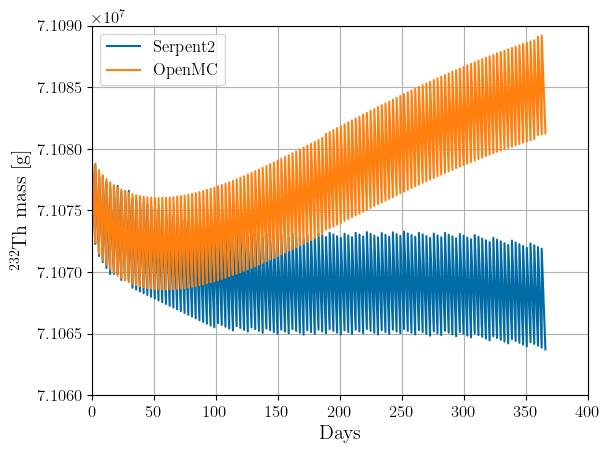

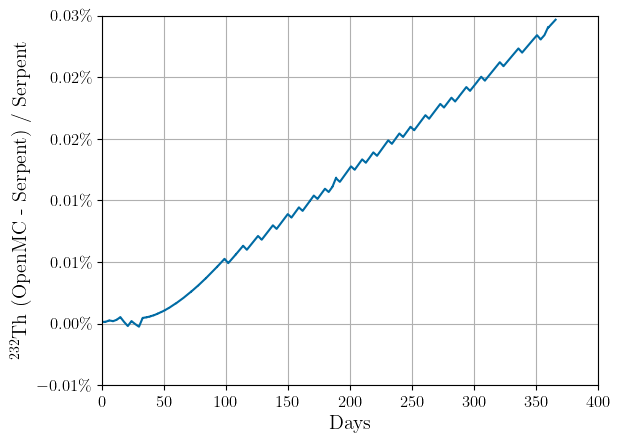

In [5]:
fig1, fig2 = plot_nuc('Th232')

In [6]:
fig1.savefig('../figs/ch5/th232_mass.pdf')
fig2.savefig('../figs/ch5/th232_mass_diff.pdf')

## $^{233}U$

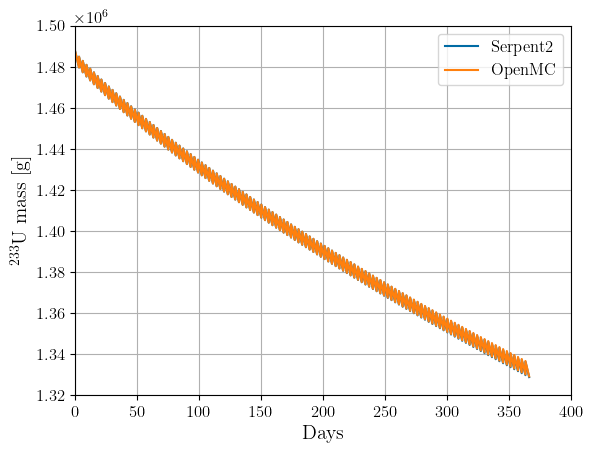

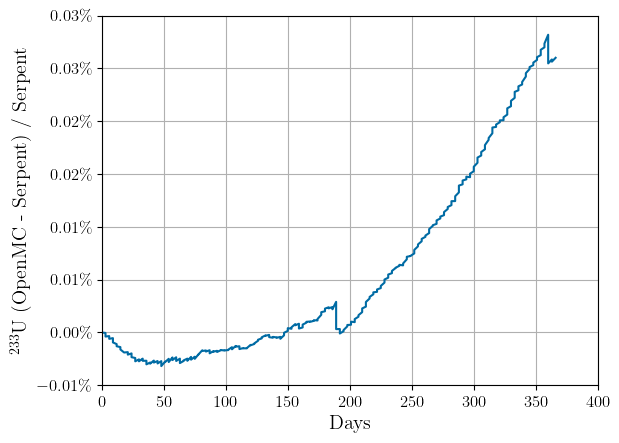

In [7]:
fig1, fig2 = plot_nuc('U233')

In [8]:
fig1.savefig('../figs/ch5/u233_mass.pdf')
fig2.savefig('../figs/ch5/u233_mass_diff.pdf')

## $^{241}Am$

In [9]:
print('Production:')
print('Parnent nuc, rxn, Energy, Branching ratio')
nuc_production['Am241']

Production:
Parnent nuc, rxn, Energy, Branching ratio


[('Pu241', 'beta-', 5355.526303, 0.9999755),
 ('Am240', '(n,gamma)', 6647090.0, 1.0),
 ('Am241', 'sf', 5627985.35, 4.3e-12),
 ('Am242', '(n,2n)', -5537600.0, 1.0),
 ('Am242_m1', '(n,2n)', -5490450.0, 1.0),
 ('Am243', '(n,3n)', -11904400.0, 1.0),
 ('Am244', '(n,4n)', -17268700.0, 1.0),
 ('Am244_m1', '(n,4n)', -17268700.0, 1.0),
 ('Cm241', 'ec/beta+', 678754.25, 0.99),
 ('Bk245', 'alpha', 371826.842, 0.0012)]

/tmp/ipykernel_481775/3362045715.py:21: RuntimeWarning: invalid value encountered in divide
  err /= spn_nuc


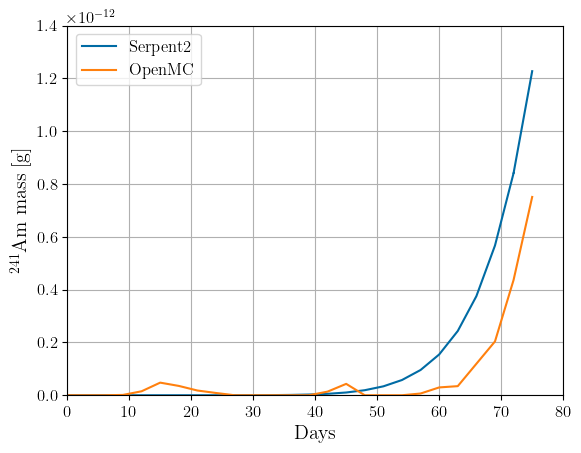

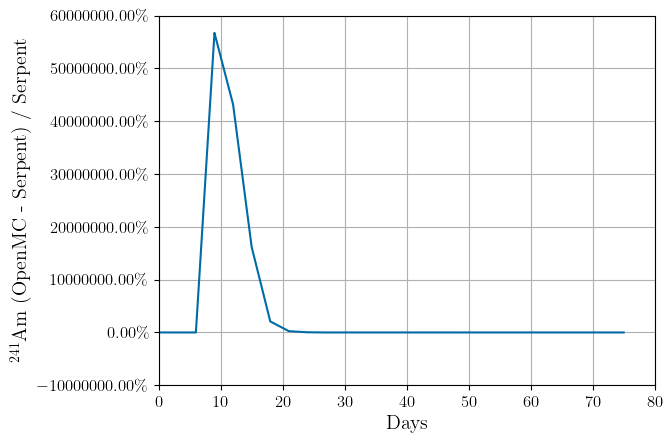

In [10]:
fig1, _ = plot_nuc('Am241',i=0, j=50)
fig1.savefig('../figs/ch5/am241_mass_bol.pdf')

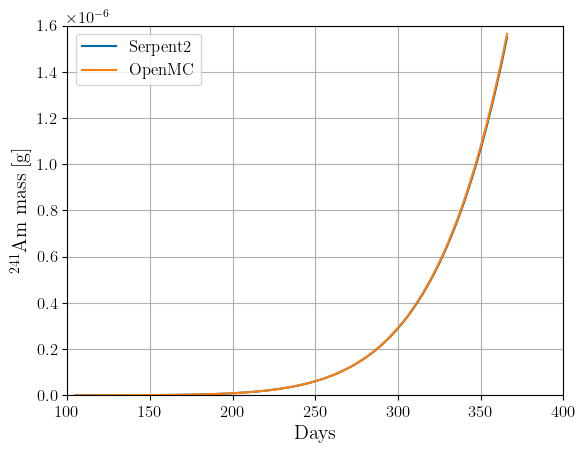

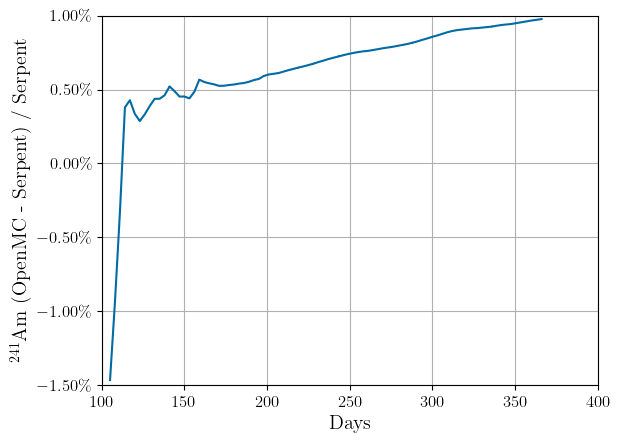

In [11]:
_, fig2 = plot_nuc('Am241',i=70)
fig2.savefig('../figs/ch5/am241_mass_eol_diff.pdf')

## $^{242}Am$

/tmp/ipykernel_481775/3362045715.py:21: RuntimeWarning: invalid value encountered in divide
  err /= spn_nuc


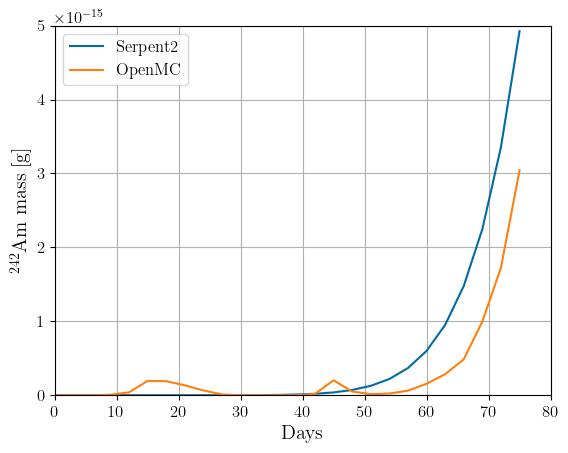

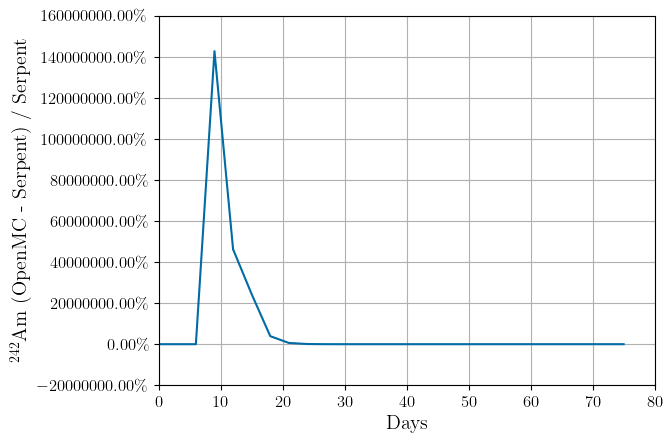

In [12]:
fig1, _ = plot_nuc('Am242',i=0, j=50)
fig1.savefig('../figs/ch5/am242_mass_bol.pdf')

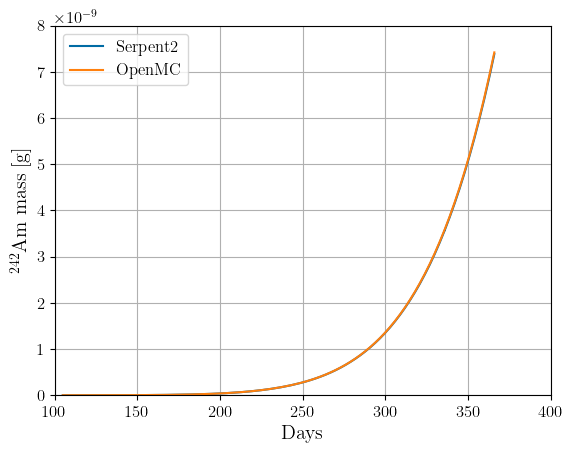

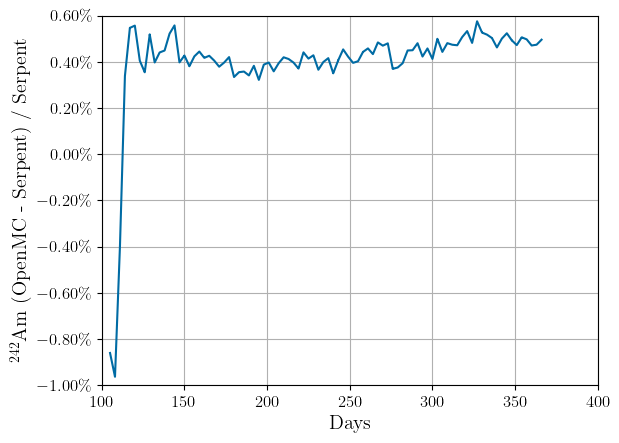

In [13]:
_, fig2 = plot_nuc('Am242',i=70)
fig2.savefig('../figs/ch5/am242_mass_eol_diff.pdf')

## $^{242}Cm$

/tmp/ipykernel_481775/3362045715.py:21: RuntimeWarning: invalid value encountered in divide
  err /= spn_nuc


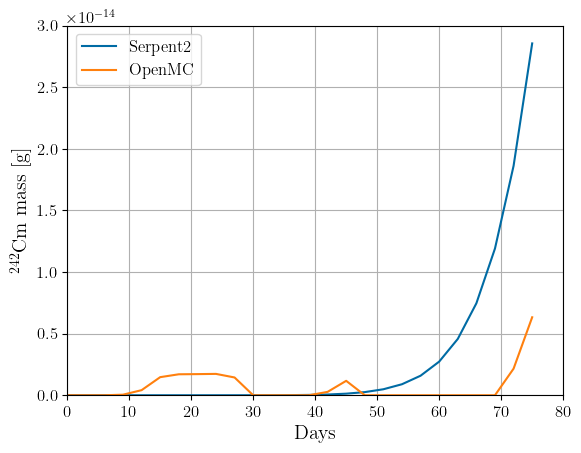

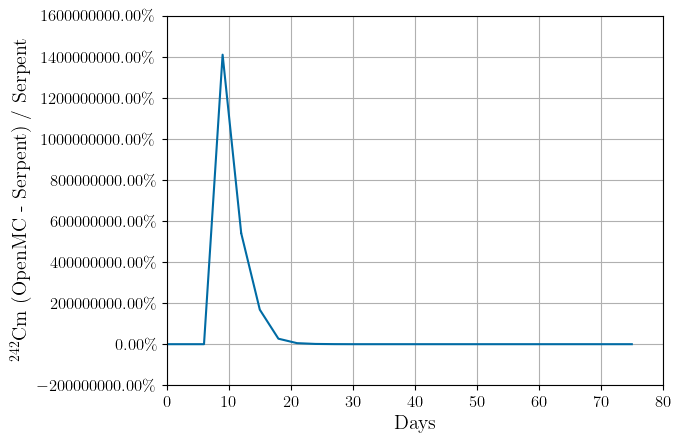

In [14]:
fig1, _ = plot_nuc('Cm242',i=0, j=50)
fig1.savefig('../figs/ch5/cm242_mass_bol.pdf')

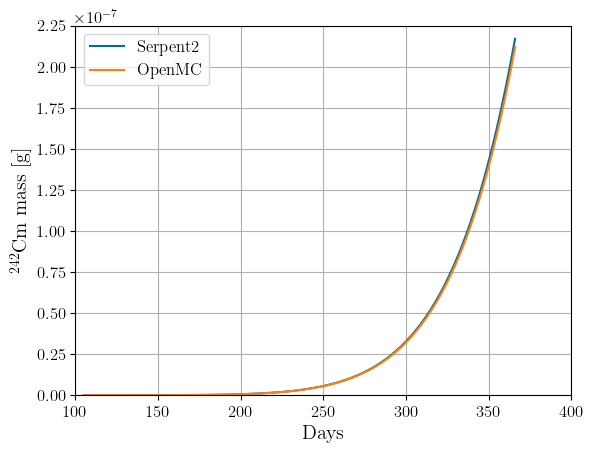

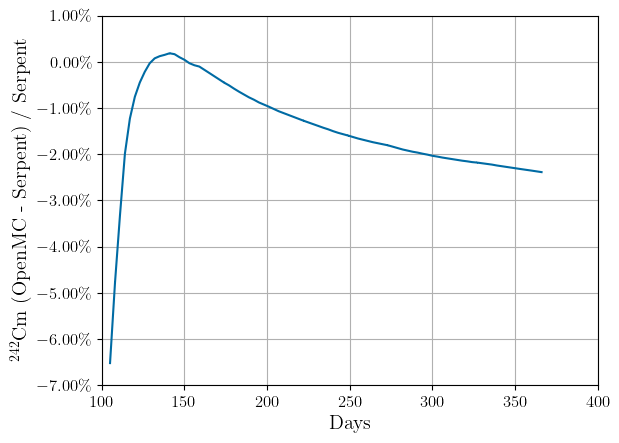

In [15]:
_, fig2 = plot_nuc('Cm242',i=70)
fig2.savefig('../figs/ch5/cm242_mass_eol_diff.pdf')

## $^{243}Cm$

/tmp/ipykernel_481775/3362045715.py:21: RuntimeWarning: divide by zero encountered in divide
  err /= spn_nuc
/tmp/ipykernel_481775/3362045715.py:21: RuntimeWarning: invalid value encountered in divide
  err /= spn_nuc


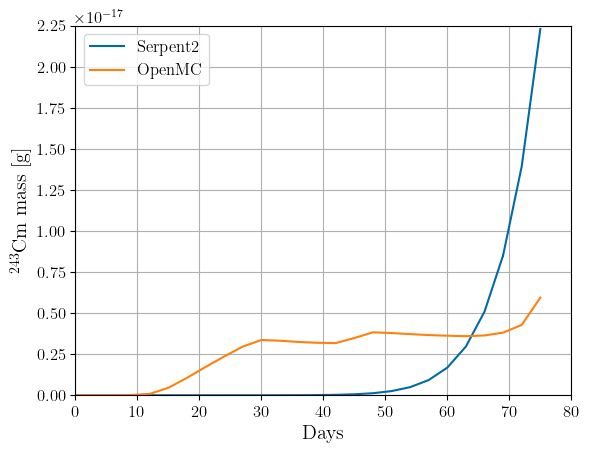

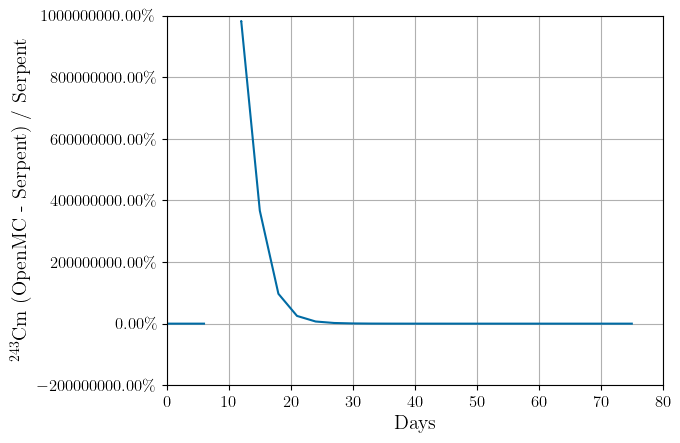

In [16]:
fig1, _ = plot_nuc('Cm243',i=0, j=50)
fig1.savefig('../figs/ch5/cm243_mass_bol.pdf')

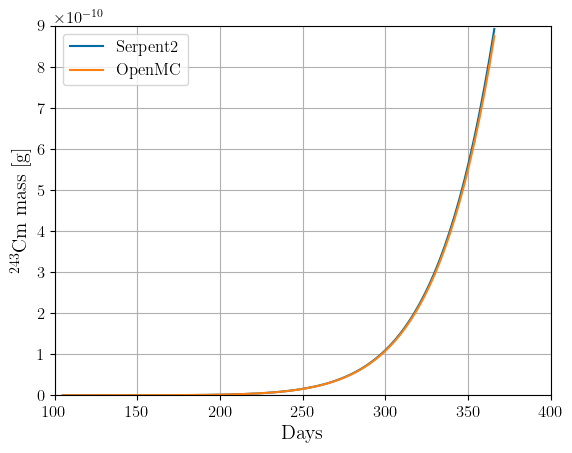

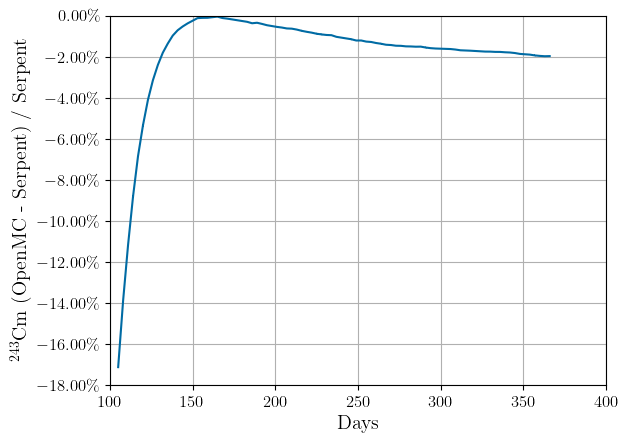

In [17]:
_, fig2 = plot_nuc('Cm243',i=70)
fig2.savefig('../figs/ch5/cm243_mass_eol_diff.pdf')

## $^{242m}Am$

/tmp/ipykernel_481775/3362045715.py:21: RuntimeWarning: invalid value encountered in divide
  err /= spn_nuc


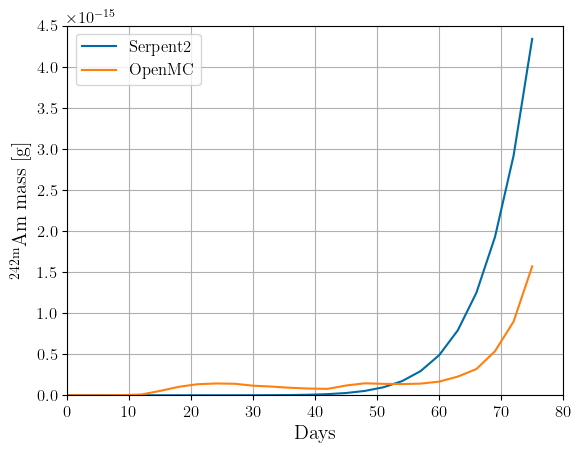

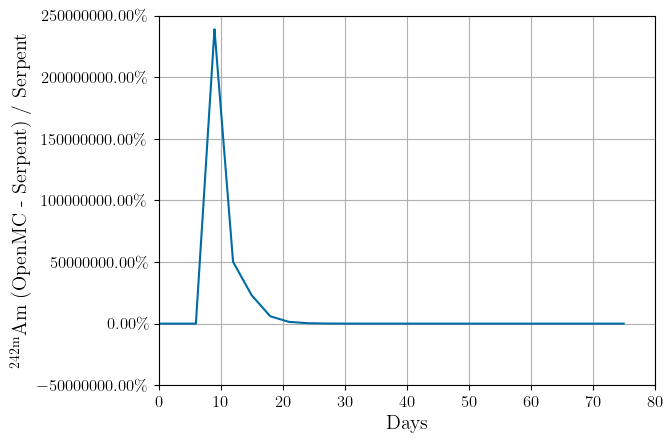

In [18]:
fig1, _ = plot_nuc('Am242_m1',i=0, j=50)

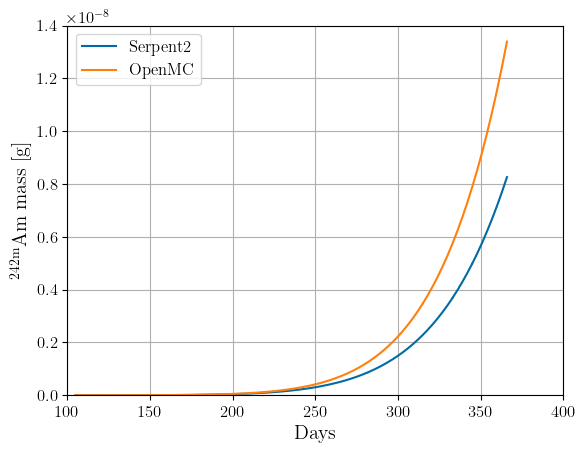

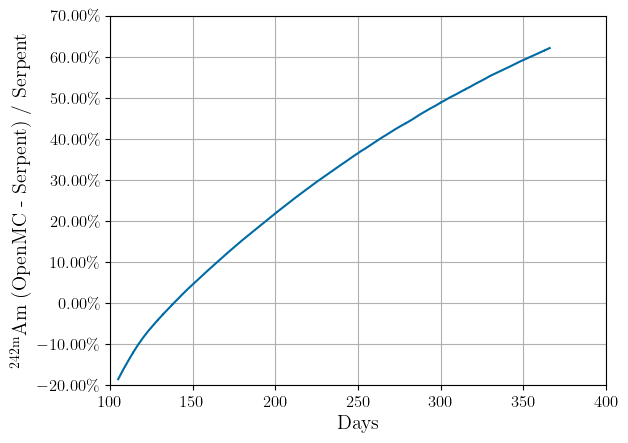

In [19]:
fig2, _ = plot_nuc('Am242_m1',i=70)
fig2.savefig('../figs/ch5/am242m_mass_eol.pdf')

## $^{245}Cm$

/tmp/ipykernel_481775/3362045715.py:21: RuntimeWarning: invalid value encountered in divide
  err /= spn_nuc


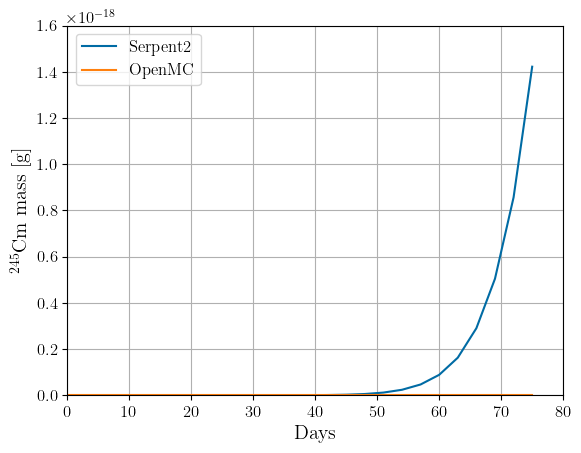

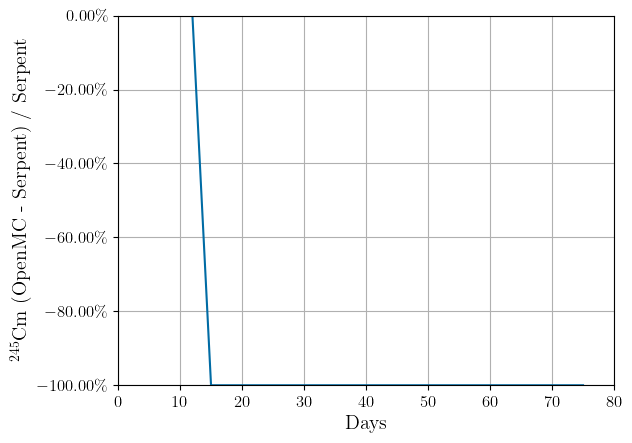

In [20]:
fig1, _ = plot_nuc('Cm245',i=0, j=50)

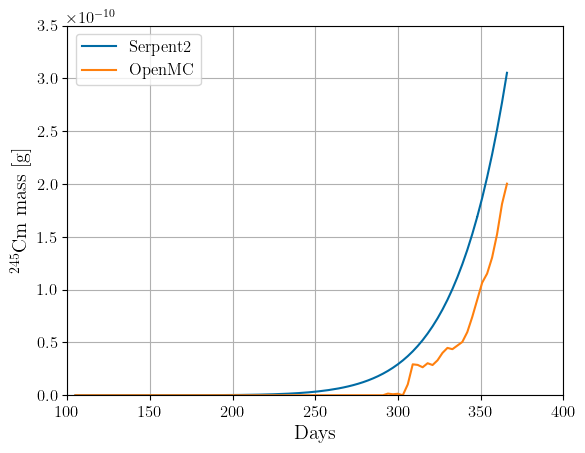

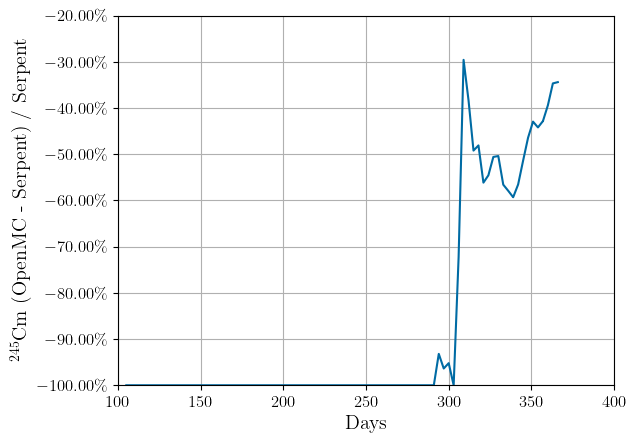

In [21]:
fig2, _ = plot_nuc('Cm245',i=70)
fig2.savefig('../figs/ch5/cm245_mass_eol.pdf')

## $^{246}Cm$

/tmp/ipykernel_481775/3362045715.py:21: RuntimeWarning: invalid value encountered in divide
  err /= spn_nuc


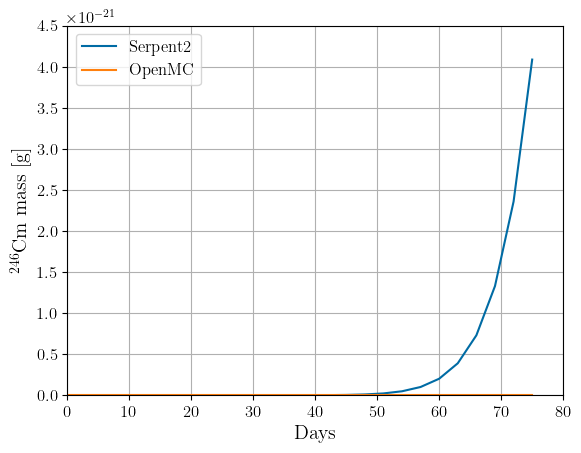

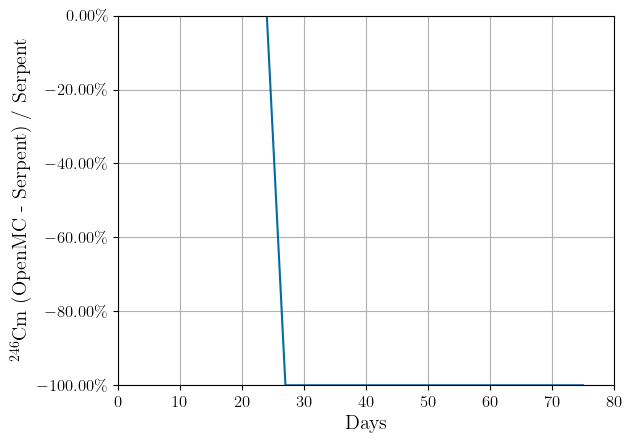

In [22]:
fig1, _ = plot_nuc('Cm246',i=0, j=50)

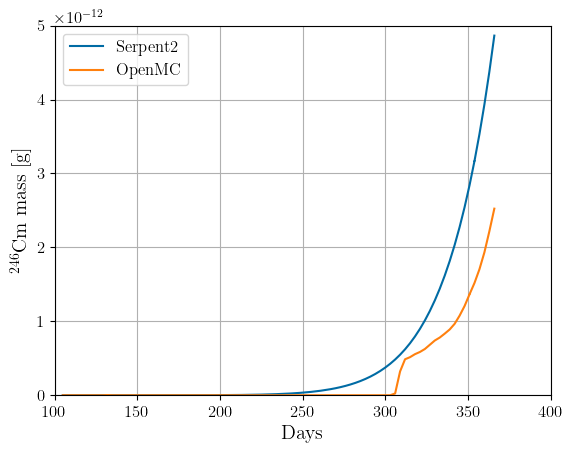

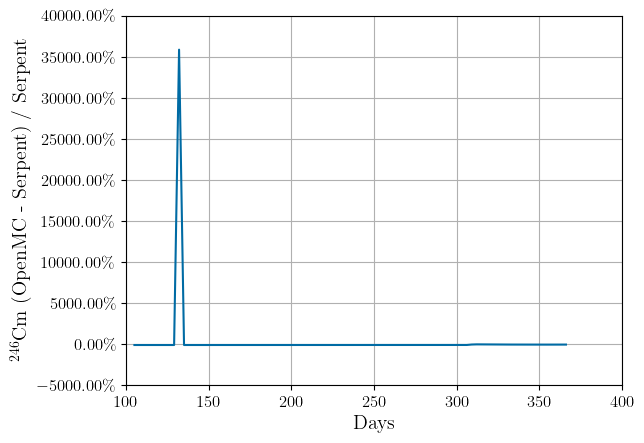

In [23]:
fig2, _ = plot_nuc('Cm246',i=70)
fig2.savefig('../figs/ch5/cm246_mass_eol.pdf')